In [62]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

df1 = pd.read_excel(r"Streamlit\Data\Afbrudte_institution_renset.xlsx")
df3 = pd.read_excel(r"Streamlit\Data\Fuldførte institution .xlsx")


Df1 was cleaned and saved to a new file in a different project/env, and the cleaning was then finished in this project.

Print the head of the data

In [63]:

df1.head()


,Institution,Subinstitution,InstitutionType,Year,Antal
0,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,421.0
1,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,26.0
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,6.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,42.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens (e-læring)",2015,40.0


Deleting the rows with "total" in them, for not getting "duplicate data"

In [64]:
df1_cleaned = df1[
    (df1['Subinstitution'] != 'Total') &
    (df1['InstitutionType'] != 'Total') &
    (df1['Subinstitution'].notna()) &
    (df1['InstitutionType'].notna())
]

Printing to see the data was properly cleaned

In [65]:
df1_cleaned.head()

,Institution,Subinstitution,InstitutionType,Year,Antal
0,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,421.0
1,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,26.0
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,6.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,42.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens (e-læring)",2015,40.0


Saving the cleaned data to a new file to make sure we have the data if something goes wrong and to merge data together properly (outcommented to keep it from saving over and over)

In [66]:
#df1_cleaned.to_excel("Afbrudte_institution_renset.xlsx", index=False)


In [67]:
df3.head(5) 

,År,Unnamed: 1,Unnamed: 2,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Institution,HovedInstitutionTx,InstitutionTx,Antal,Antal,Antal,Antal,Antal,Antal,Antal,Antal,Antal,Antal
1,Erhvervsakademier,Total,NaN,7950,8759,8946,9084,8987,8752,8890,9297,9996,8296
2,Erhvervsakademier,Erhvervsakademi Dania,Total,706,788,819,762,777,736,763,767,853,578
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",45,81,64,64,46,51,64,58,54,50
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",53,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 2 unnamed rows which we would like to remove and clean by the following code

In [68]:
df3.columns = df3.iloc[0]        
df3 = df3.drop(index=0)          
df3.reset_index(drop=True, inplace=True)  

Now the 2 unnamed rows are gone and it looks more clean

In [69]:
df3.head() 

,Institution,HovedInstitutionTx,InstitutionTx,Antal,Antal,Antal,Antal,Antal,Antal,Antal,Antal,Antal,Antal
0,Erhvervsakademier,Total,NaN,7950,8759,8946,9084,8987,8752,8890,9297,9996,8296
1,Erhvervsakademier,Erhvervsakademi Dania,Total,706,788,819,762,777,736,763,767,853,578
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",45,81,64,64,46,51,64,58,54,50
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",53,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hedensted",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN


Giving the columns more suitable names to work with

In [70]:
df3.columns = ['Institution', 'Subinstitution', 'InstitutionType'] + [str(year) for year in range(2015, 2025)]

In [71]:
df3.head() 

,Institution,Subinstitution,InstitutionType,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Erhvervsakademier,Total,NaN,7950,8759,8946,9084,8987,8752,8890,9297,9996,8296
1,Erhvervsakademier,Erhvervsakademi Dania,Total,706,788,819,762,777,736,763,767,853,578
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",45,81,64,64,46,51,64,58,54,50
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",53,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hedensted",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN


Found a function from panda to group the data making it more suitable for machine learning and other visualization techniques

In [72]:
df3_melted = pd.melt(df3, id_vars=['Institution', 'Subinstitution', 'InstitutionType'], var_name='År', value_name='Antal')

In [73]:
df3_melted.head()

,Institution,Subinstitution,InstitutionType,År,Antal
0,Erhvervsakademier,Total,NaN,2015,7950
1,Erhvervsakademier,Erhvervsakademi Dania,Total,2015,706
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,45
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,53
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hedensted",2015,NaN


In [74]:

df3_melted['År'] = pd.to_numeric(df3_melted['År'], errors='coerce')


df3_melted['Antal'] = pd.to_numeric(df3_melted['Antal'], errors='coerce')



In [75]:
df3_melted.head()

,Institution,Subinstitution,InstitutionType,År,Antal
0,Erhvervsakademier,Total,NaN,2015,7950.0
1,Erhvervsakademier,Erhvervsakademi Dania,Total,2015,706.0
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,45.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,53.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hedensted",2015,NaN


Deleting the rows with "total" in them, for not getting "duplicate data"

In [76]:
df3_cleaned = df3_melted[
    (df3_melted['Subinstitution'] != 'Total') &
    (df3_melted['InstitutionType'] != 'Total') &
    (df3_melted['Subinstitution'].notna()) &
    (df3_melted['InstitutionType'].notna())
]

In [77]:
df3_cleaned.head()

,Institution,Subinstitution,InstitutionType,År,Antal
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,45.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,53.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hedensted",2015,NaN
5,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,62.0
6,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,27.0


Saving the cleaned data to a new file to make sure we have the data if something goes wrong and to merge data together properly (outcommented to keep it from saving over and over)

In [78]:
#df3_cleaned.to_excel("Fuldførte_institution_renset.xlsx", index=False)


setting our first data equal to the cleaned versions

In [79]:
df1 = df1_cleaned

df3 = df3_cleaned

Just checking to see the names of the columns are correct and match which they dont

In [80]:
df1.head()


,Institution,Subinstitution,InstitutionType,Year,Antal
0,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,421.0
1,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,26.0
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,6.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,42.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens (e-læring)",2015,40.0


Fixing my mistake

In [81]:
df1 = df1.rename(columns={'Year': 'År'})

In [82]:
df1.head()


,Institution,Subinstitution,InstitutionType,År,Antal
0,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,421.0
1,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,26.0
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,6.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,42.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens (e-læring)",2015,40.0


In [83]:
df3.head()

,Institution,Subinstitution,InstitutionType,År,Antal
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,45.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,53.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hedensted",2015,NaN
5,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,62.0
6,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,27.0


Starting with renaming "antal" to the respective names for merging the datasets

In [84]:
df1 = df1.rename(columns={'Antal': 'Afbrudte'})
df3 = df3.rename(columns={'Antal': 'Fuldførte'})

In [85]:
df1.head()

,Institution,Subinstitution,InstitutionType,År,Afbrudte
0,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,421.0
1,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,26.0
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,6.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,42.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens (e-læring)",2015,40.0


In [86]:
df3.head()

,Institution,Subinstitution,InstitutionType,År,Fuldførte
2,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Grenaa",2015,45.0
3,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hadsten",2015,53.0
4,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hedensted",2015,NaN
5,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Hobro",2015,62.0
6,Erhvervsakademier,Erhvervsakademi Dania,"Erhvervsakademi Dania, Horsens",2015,27.0


Merging the 2 datasets to 1 

In [87]:
df_institution_combined = pd.merge(df1, df3, on=['Institution', 'Subinstitution', 'InstitutionType', 'År'], how='outer')

In [88]:
#df_institution_combined.to_excel("Streamlit\Data\Afbrudte_og_fuldførte_institution.xlsx", index=False)

checking to see if it worked. A lot of NaN values due to the institutions not being created/established or the number of dropouts are lower than 5 

In [89]:
df_institution_combined.head(20)

,Institution,Subinstitution,InstitutionType,År,Afbrudte,Fuldførte
0,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2015,NaN,12.0
1,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2016,NaN,NaN
2,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2017,NaN,NaN
3,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2018,NaN,NaN
4,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2019,NaN,NaN
5,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2020,NaN,NaN
6,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2021,NaN,NaN
7,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2022,NaN,NaN
8,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2023,NaN,NaN
9,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2024,NaN,NaN


Handling all the NaN values setting them to 0 because of the chance that the NaN values mean that 5 or less people have either graduated or dropouted still counts as data

In [90]:
df_institution_combined['Afbrudte'] = df_institution_combined['Afbrudte'].fillna(0)
df_institution_combined['Fuldførte'] = df_institution_combined['Fuldførte'].fillna(0)


In [91]:
df_institution_combined.head(20)

,Institution,Subinstitution,InstitutionType,År,Afbrudte,Fuldførte
0,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2015,0.0,12.0
1,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2016,0.0,0.0
2,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2017,0.0,0.0
3,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2018,0.0,0.0
4,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2019,0.0,0.0
5,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2020,0.0,0.0
6,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2021,0.0,0.0
7,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2022,0.0,0.0
8,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2023,0.0,0.0
9,Erhvervsakademier,Erhvervsakademi Aarhus,"Erhvervsakademi Aarhus, Aarhus N",2024,0.0,0.0


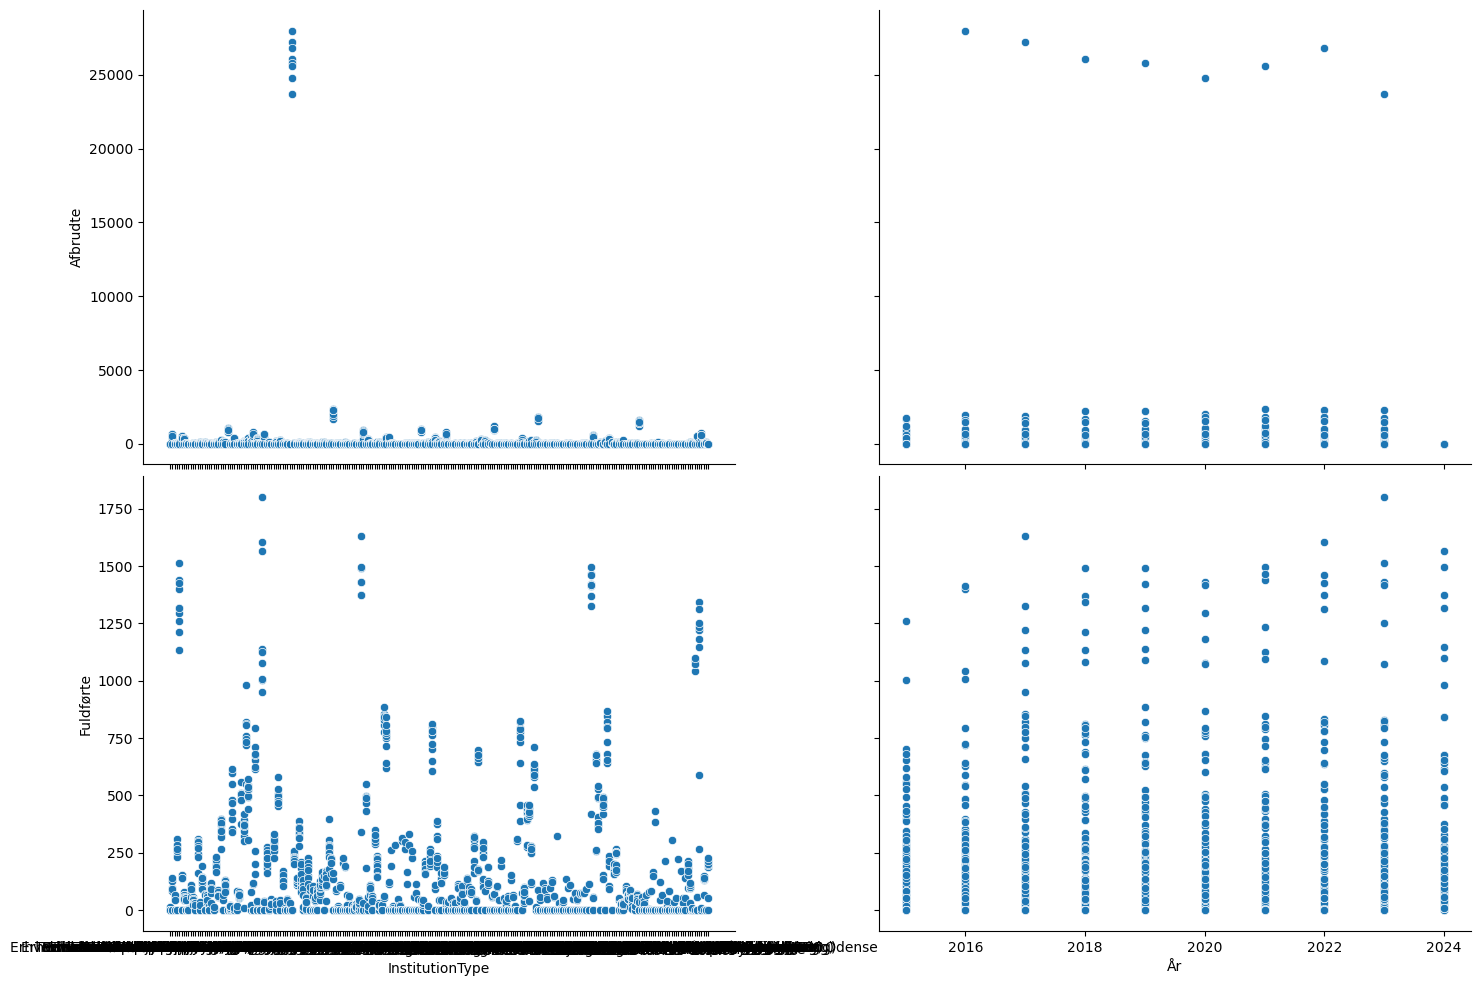

In [92]:
sns.pairplot(df_institution_combined, x_vars=['InstitutionType', 'År'], y_vars=['Afbrudte', 'Fuldførte'], height=5, aspect=1.5)
plt.show()
df_institution_combined['Afbrudte'] = df_institution_combined['Afbrudte'].astype(float)

I can see there are some really high values up to 28000, which is the combined graduated for 1 year spanding from 2016-2023, which complicates the data. Therefor we'll take that out from our dataset

In [93]:
df_institution_combined = df_institution_combined[~df_institution_combined["Institution"].isin(["Institution", "HovedInstitutionTx", "Hovedinstitution"])]


Now the plot looks more correct

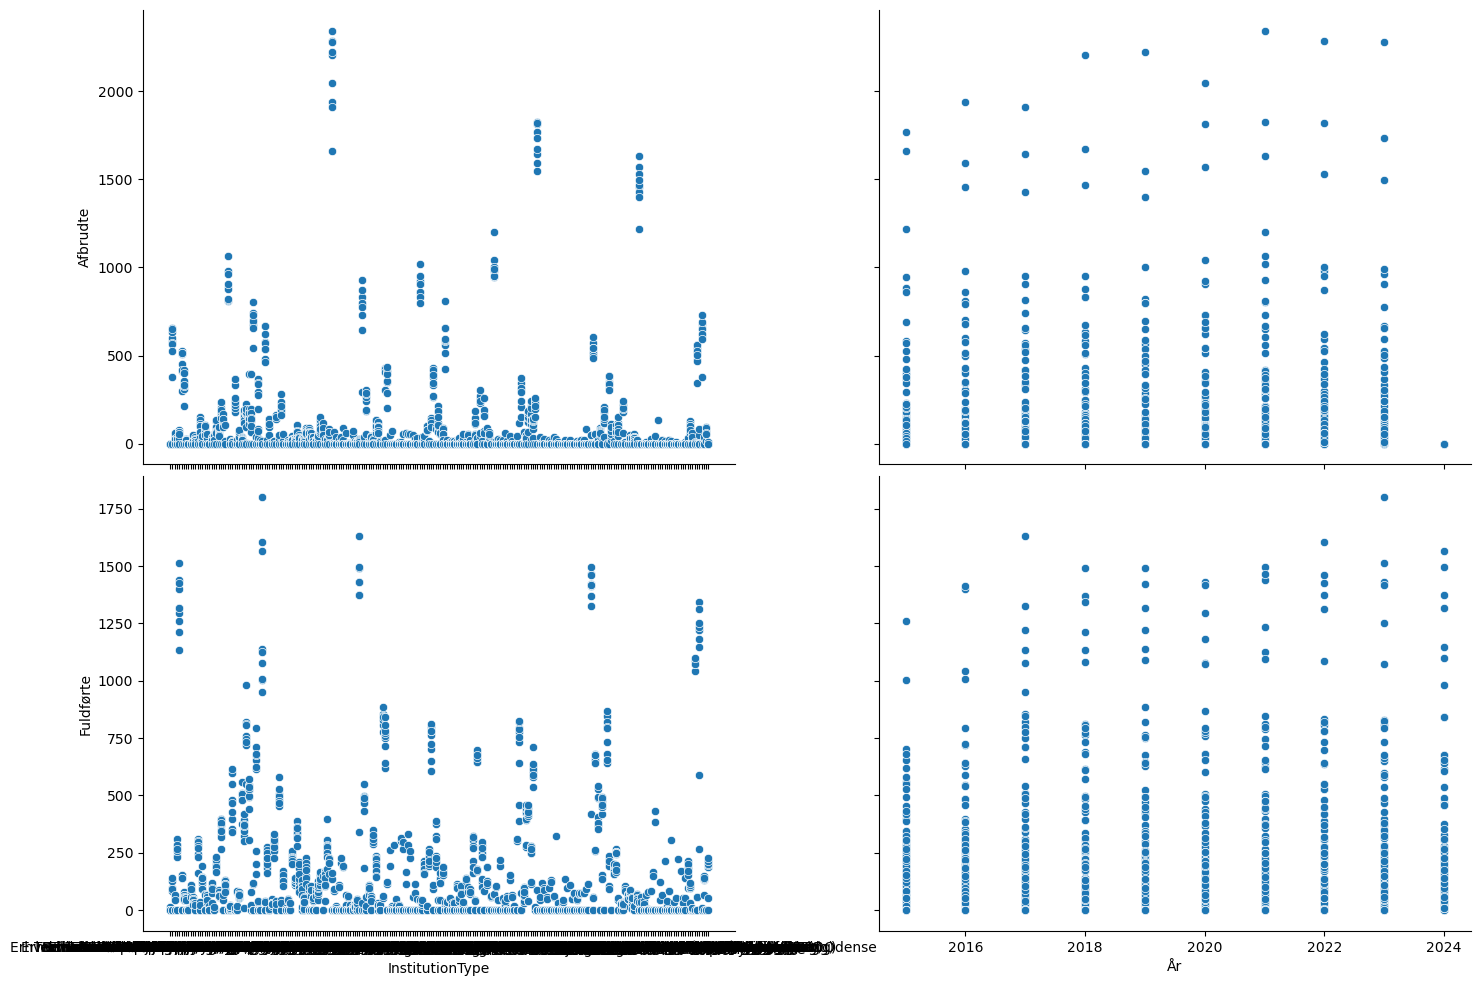

In [94]:
sns.pairplot(df_institution_combined, x_vars=['InstitutionType', 'År'], y_vars=['Afbrudte', 'Fuldførte'], height=5, aspect=1.5)
plt.show()
df_institution_combined['Afbrudte'] = df_institution_combined['Afbrudte'].astype(float)

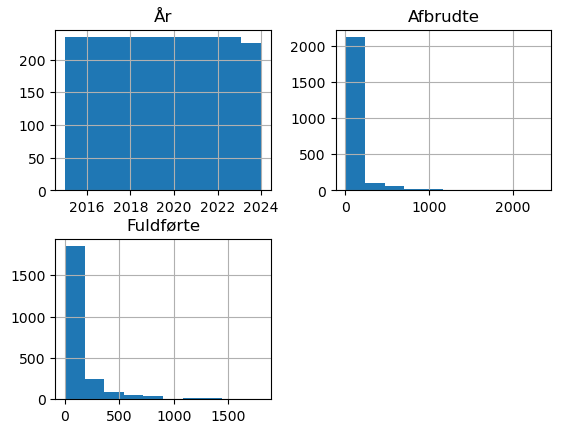

In [95]:
hist = df_institution_combined.hist()
plt.show()

In [96]:
df_institution_combined.describe()

,År,Afbrudte,Fuldførte
count,2331.000000,2331.000000,2331.000000
mean,2019.482625,85.875161,123.354783
std,2.864766,242.587701,249.613335
min,2015.000000,0.000000,0.000000
25%,2017.000000,0.000000,0.000000
50%,2019.000000,0.000000,0.000000
75%,2022.000000,53.500000,127.000000
max,2024.000000,2344.000000,1801.000000


In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer  

In [98]:
df_institution_combined['dropout_rate'] = df_institution_combined['Afbrudte'] / (df_institution_combined['Afbrudte'] + df_institution_combined['Fuldførte'])

In [99]:
feature_cols = ['År', 'InstitutionType']

In [100]:
X = df_institution_combined[feature_cols]   
y = df_institution_combined['dropout_rate']

In [101]:
encoder = ColumnTransformer(
    transformers=[('inst_type', OneHotEncoder(), ['InstitutionType'])],
    remainder='passthrough'
)

X_encoded = encoder.fit_transform(X)

In [102]:
y.head(50)

0     0.000000
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10    1.000000
11    1.000000
12    0.860570
13    0.870523
14    0.854985
15    0.885290
16    0.868984
17    0.751984
18    0.792169
19    0.000000
20         NaN
21    1.000000
22    0.358696
23    0.425743
24    0.407767
25    0.491071
26    0.521008
27    0.341176
28    0.287234
29    0.000000
30         NaN
31    1.000000
32    0.118380
33    0.060790
34    0.084615
35    0.062069
36    0.094488
37    0.061818
38    0.083601
39    0.000000
40    0.008655
41    0.054091
42    0.057404
43    0.046457
44    0.036630
45    0.048423
46    0.033580
47    0.023320
48    0.033823
49    0.000000
Name: dropout_rate, dtype: float64

In [103]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(2331, 2)


In [104]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(2331,)


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1864, 235)
(1864,)
(467, 235)
(467,)


In [107]:
y_test.head()

563     0.172324
1428         NaN
1664    0.410526
658     0.430052
1450         NaN
Name: dropout_rate, dtype: float64

In [108]:
y_train = y_train.fillna(y_train.mean())


In [109]:


# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)



LinearRegression()

In [110]:
print('b0=', linreg.intercept_)
print('bi=', linreg.coef_)

b0= 10.055415626886921
bi= [-1.57602000e-01  3.65001291e-01  6.04777024e-01  2.30258144e-01
 -3.34778392e-01  4.68822526e-01 -3.73845446e-01 -2.65968409e-01
  4.60388732e-01 -3.40007926e-01  4.77594025e-01 -1.47769333e-01
 -3.29893697e-01  5.03321626e-01  5.95416080e-01 -3.11657093e-01
 -2.91703344e-02  5.42319648e-01 -5.77547977e-03  5.14200016e-01
 -5.45833946e-02 -5.49955544e-02 -6.28900365e-02  6.16349863e-01
 -1.58446067e-02 -2.78088287e-01 -3.70137747e-01  4.20982123e-01
 -1.05522497e-02 -2.44307557e-01 -3.44001154e-01 -1.17704753e-01
 -2.31072800e-01 -3.20622004e-01 -1.77701161e-01 -2.52252456e-01
 -3.99048911e-02  5.29597328e-01 -3.37448591e-03 -9.37327068e-02
 -8.54875824e-02 -1.02429996e-01 -4.80187122e-02  4.00930815e-01
  7.63040374e-02 -1.91193173e-01 -3.53045732e-01  4.50294216e-01
  4.65051886e-01  4.41548871e-01 -5.19232375e-02 -3.77802934e-01
  2.02489677e-02  4.89756714e-01 -3.78308363e-01  4.46864670e-01
 -3.51406874e-01  4.35087547e-01 -3.32161915e-01 -9.36361442e-0

In [111]:
list(zip(feature_cols, linreg.coef_))

[('År', -0.1576020002765866), ('InstitutionType', 0.36500129065133063)]

In [112]:
y_test.head()

563     0.172324
1428         NaN
1664    0.410526
658     0.430052
1450         NaN
Name: dropout_rate, dtype: float64

In [113]:
y_predicted = linreg.predict(X_test)

In [114]:


y_predicted



array([ 1.17206996e-01,  3.37044587e-01,  3.43049234e-01,  3.82287959e-01,
        3.72294467e-01,  8.83333587e-01,  3.39112029e-01,  8.82683284e-01,
        1.21668457e-01,  2.85206871e-01,  1.14863056e-02,  3.37048760e-02,
        5.91517713e-01,  4.99753122e-02,  8.34501537e-01,  3.20260983e-01,
        3.91449815e-01,  1.01356353e+00,  3.77082867e-01,  2.34662937e-02,
        2.81615527e-01,  3.45911343e-02,  1.69676080e-01,  3.89336026e-01,
        8.52103066e-01,  9.65619687e-02,  9.80847825e-01,  3.14431905e-01,
        9.68471893e-01,  2.56476415e-01,  2.33129635e-01,  8.67179197e-01,
        3.02454773e-01,  3.21608372e-01,  8.91758779e-01,  2.70058724e-01,
        2.52583277e-01,  3.18960327e-01,  1.00478875e+00,  2.93586555e-01,
        8.46897928e-01,  3.69897182e-01,  3.70697922e-01,  1.96143360e-02,
        9.26087986e-01,  3.21703422e-01,  2.60774976e-01,  2.86472032e-02,
        3.87076358e-01,  3.12913945e-01,  3.56655875e-01,  3.62097174e-01,
        3.13972002e-02,  

In [115]:
from sklearn import metrics

In [116]:
y_test = y_test.fillna(y_test.mean())

In [117]:
print(metrics.mean_absolute_error(y_test, y_predicted))

0.14135409420316752


In [118]:
print(metrics.mean_squared_error(y_test, y_predicted))

0.04038190108104042


In [119]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.7


In [120]:


# R-squared
r2_score(y_test, y_predicted)



0.6876638388355034

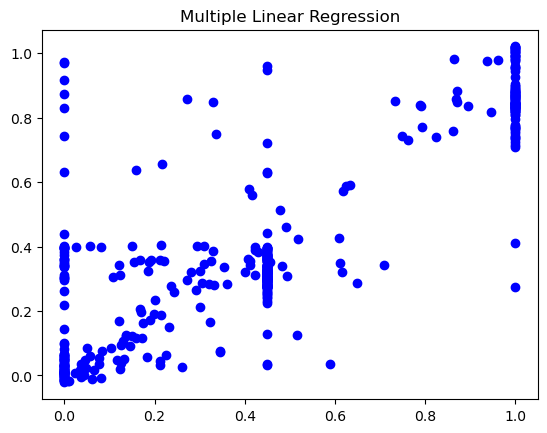

In [121]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()